In [75]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import tifffile as tf
import numpy as np
import os
from netCDF4 import Dataset
import rasterio

import matplotlib.patches as mpatches
import cartopy.crs as ccrs
#import descartes # required to plot polygons
import cartopy.io.img_tiles as cimgt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [76]:
# User defined settings for pathogen and scenario selection

pathogen = 'E.coli' # select the pathogen for the simulation. Option at the moment is only 'E.coli'
source = 'Sewer_and_pluvial' #select the source of the pathogen. At the moment only 'Sewer_and_pluvial'
conc = 'max' #select the concentration of the pathogen: options are 'min' and 'max'
doseresp = 'poisson' #select the dose response curve of the pathogen for infection calculation. Either 'beta poisson' (keyword: 'poisson') or exponantial ('exp', not yet included)

#form values for poisson distribution
N50 = 896 #constant for the beta poisson infection risk calculation
NoE  = 4  #number of events per year 
alpha = 0.145 #form value for poisson distribution

In [77]:
"""
with rasterio.open('pop_dens.tif') as src:
    window= rasterio.windows.Window(400, 525, 150, 150)
    subset = src.read(window=window)
    transform = src.window_transform(window)
    meta = src.meta.copy()
    meta.update({
        'height': window.height,
        'width': window.width,
        'transform': transform
    })

 
# Write the subset to a new file   
with rasterio.open('pop_dens_zoom.tif', 'w', **meta) as dst:
    dst.write(subset)

"""

"\nwith rasterio.open('pop_dens.tif') as src:\n    window= rasterio.windows.Window(400, 525, 150, 150)\n    subset = src.read(window=window)\n    transform = src.window_transform(window)\n    meta = src.meta.copy()\n    meta.update({\n        'height': window.height,\n        'width': window.width,\n        'transform': transform\n    })\n\n \n# Write the subset to a new file   \nwith rasterio.open('pop_dens_zoom.tif', 'w', **meta) as dst:\n    dst.write(subset)\n\n"

### read in maps & plot them

In [78]:
flood = tf.imread('flooded_zoom.tif')
fl = flood.copy()

fl=fl*10 #creating -inf instead of floating veeeery small number 
flooded = fl.copy()
flooded[np.isinf(flooded)] = np.nan
flooded = flooded/10 #setting values back
print(np.nanmin(flooded))
print(np.nanmax(flooded))

-10.4919195
11.578357


C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\3882315716.py:4: RuntimeWarning: overflow encountered in multiply
  fl=fl*10 #creating -inf instead of floating veeeery small number


C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\4175759298.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


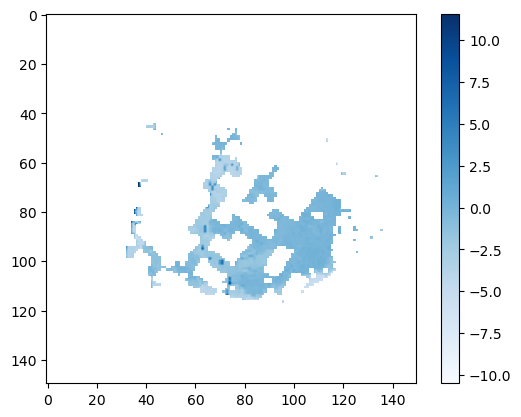

In [79]:
cmap = mpl.colormaps['Blues']
norm = plt.Normalize(vmin=np.nanmin(flooded), vmax=np.nanmax(flooded))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(flooded, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

In [80]:
"""
hist, bins = np.histogram(flooded, bins=10, range=(np.nanmin(flooded), np.nanmax(flooded)))

# Plot the histogram
plt.hist(flooded, bins=20, range=(np.nanmin(flooded),np.nanmax(flooded)))
plt.title("Histogram of flooding classes")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
"""

'\nhist, bins = np.histogram(flooded, bins=10, range=(np.nanmin(flooded), np.nanmax(flooded)))\n\n# Plot the histogram\nplt.hist(flooded, bins=20, range=(np.nanmin(flooded),np.nanmax(flooded)))\nplt.title("Histogram of flooding classes")\nplt.xlabel("Value")\nplt.ylabel("Frequency")\nplt.show()\n'

In [81]:
popdenst = tf.imread('pop_dens_zoom.tif')
popd = popdenst.copy()
popd=popd*10 #creating -inf instead of floating veeeery small number 
popdens = popd.copy()
popdens[np.isinf(popdens)] = np.nan
popdens = popdens/10 #setting values back

print(np.nanmax(popdens))
print(np.nanmin(popdens))

141.86479
4.25104


C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\2845886501.py:3: RuntimeWarning: overflow encountered in multiply
  popd=popd*10 #creating -inf instead of floating veeeery small number


C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\4118336793.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


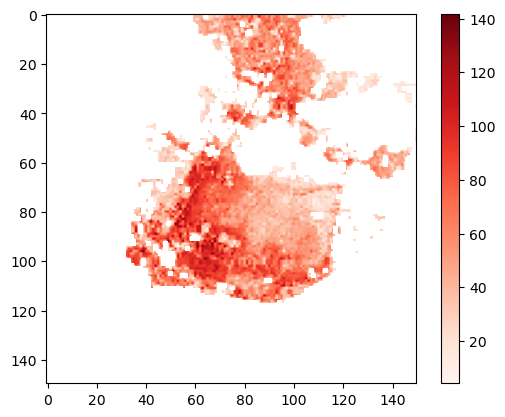

In [82]:
cmap = mpl.colormaps['Reds']
norm = plt.Normalize(vmin=np.nanmin(popdens), vmax=np.nanmax(popdens))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(popdens, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

### Visualize & calculate affected population

In [83]:
overl_flarea = np.where(flooded >= np.nanmin(flooded),popdens,np.nan)
overl_dryarea = np.where(np.isnan(flooded),popdens,np.nan)

C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\3481121497.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


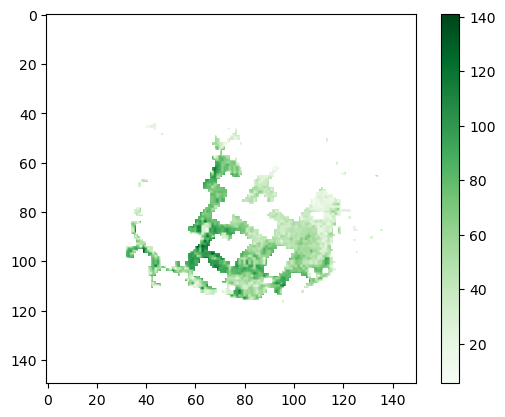

C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\3481121497.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


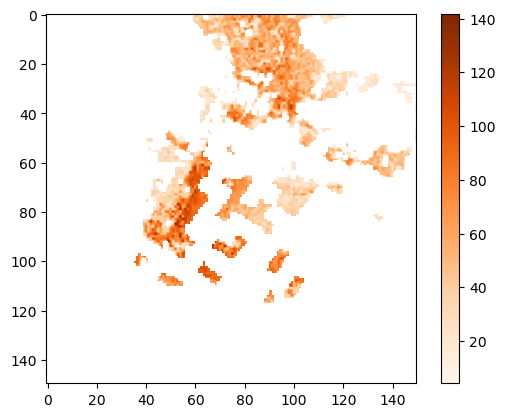

In [84]:
cmap = mpl.colormaps['Greens']
norm = plt.Normalize(vmin=np.nanmin(overl_flarea), vmax=np.nanmax(overl_flarea))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(overl_flarea, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

cmap = mpl.colormaps['Oranges']
norm = plt.Normalize(vmin=np.nanmin(overl_dryarea), vmax=np.nanmax(overl_dryarea))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(overl_dryarea, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

In [85]:
print('total inhabitants in total area:', round(np.nansum(popdens),0))
print('total inhabitants in flooded area:', round(np.nansum(overl_flarea),0), '(', round((np.nansum(overl_flarea)/np.nansum(popdens))*100,0),'%)')
print('total inhabitants in dry area:', round(np.nansum(overl_dryarea),0), '(', round((np.nansum(overl_dryarea)/np.nansum(popdens))*100,0),'%)')

total inhabitants in total area: 347166.0
total inhabitants in flooded area: 137904.0 ( 40.0 %)
total inhabitants in dry area: 209261.0 ( 60.0 %)


### Relate pathogen concentration to exposure levels
In this part, four flooding water depths are assumed: 0-0.10 (value 1), 0.1-0.5 (value 2),0.5-1.5 (value 3)and >1.5 (value 4). It is assumed that value 1 has no additional expore to not flooded, value 2 relates to wading of both children and adults, value 3 to swimming of children and wading by adults and value 4 both children and adults swim 


In [86]:
wclass = flooded.copy()
wclass[wclass>0]=np.nan
wclass[np.logical_and(wclass<0,wclass>=-0.1)]= 1
wclass[np.logical_and(wclass<-0.1,wclass>=-0.5)]=2
wclass[np.logical_and(wclass<-0.5,wclass>=-1.5)]=3
wclass[wclass<-1.5]= 4


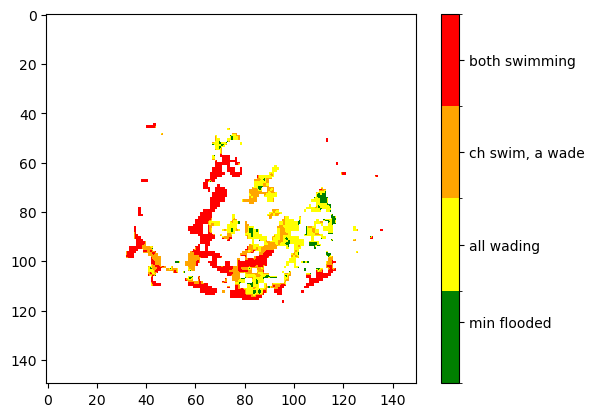

In [87]:
cmap = ListedColormap(['green', 'yellow', 'orange', 'red'])
bounds = [0, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()

im = ax.imshow(wclass, cmap=cmap, norm=norm)
cbar = fig.colorbar(im, ticks=[1,2, 3,4], boundaries=bounds)
cbar.ax.set_yticklabels(['min flooded', 'all wading', 'ch swim, a wade', 'both swimming'])
plt.show()

In [88]:
np.nansum(wclass[wclass==1])

194.0

In [89]:
# make distinction between adults&children
# together with population data you know how many in each class, which can be highlighted in maps
print('total inhabitants in minimum flooded area:', round(np.nansum(wclass[wclass==1]),0),'(',round((np.nansum(wclass[wclass==1])/np.nansum(wclass))*100,0),'%)')
print('total inhabitants in area where everyone is wading:', round(np.nansum(wclass[wclass==2]),0),'(',round((np.nansum(wclass[wclass==2])/np.nansum(wclass))*100,0),'%)')
print('total inhabitants in area where children swim and adults wade:', round(np.nansum(wclass[wclass==3]),0),'(',round((np.nansum(wclass[wclass==3])/np.nansum(wclass))*100,0),'%)')
print('total inhabitants in area where everyone is swimming:', round(np.nansum(wclass[wclass==4]),0),'(',round((np.nansum(wclass[wclass==4])/np.nansum(wclass))*100,0),'%)')

# exposure data should be read in from text file
# read in dose response relations (via text file - link to different modules)

total inhabitants in minimum flooded area: 194.0 ( 3.0 %)
total inhabitants in area where everyone is wading: 1416.0 ( 21.0 %)
total inhabitants in area where children swim and adults wade: 1494.0 ( 22.0 %)
total inhabitants in area where everyone is swimming: 3648.0 ( 54.0 %)


In [90]:
# read in pathogen concentrations & select concentration
file = open("Scenarios.txt", "r")
for line in file:
    if "E.coli" in line:
        Scenario = line.strip().split(',')
        #print(Scenario)
file.close()

# loops should be incorporated/or working with functions....

if Scenario[0]==pathogen:
    print('Selected pathogen:',Scenario[0])
    if Scenario[1]==source:
        print('used source:',Scenario[1])
        unit = Scenario[4]
        print('used unit:',unit)
        if conc=='min':
            PathConc = Scenario[2]
            print('Using minimum concentration:', PathConc)
        elif conc == 'max':
            PathConc = Scenario[3]
            print('Using maximum concentration:', PathConc)
        else:
            print('No concentration data found for the inserted scenario')

PathConc = float(PathConc.strip().strip("'"))

Selected pathogen: E.coli
used source: Sewer_and_pluvial
used unit: mpn/ml
Using maximum concentration: 14


In [97]:
# read in exposure data & calculation of the dose
file = open("Exposure.txt", "r")
for line in file:
    if "E.coli" in line:
        Exposure = line.strip().split(',')
        print(Exposure)
file.close()

if Scenario[0]==pathogen:
    print('Selected pathogen:',Scenario[0])
    Ad_sp = float(Exposure[1].strip().strip("'"))
    Ad_sw = float(Exposure[2].strip().strip("'"))
    Ch_pl = float(Exposure[3].strip().strip("'"))
    Ch_sw = float(Exposure[4].strip().strip("'"))


dAd_sp = (PathConc/1000)*Ad_sp
dAd_sw = (PathConc/1000)*Ad_sw

dCh_pl = (PathConc/1000)*Ch_pl
dCh_sw = (PathConc/1000)*Ch_sw

print(dAd_sp)
print(dAd_sw)
print(dCh_pl)
print(dCh_sw)

['E.coli', '10', ' 30', ' 30', ' 50', ' #Splashed adult;swimming adult;playing children; swimming children']
Selected pathogen: E.coli
0.14
0.42
0.42
0.7000000000000001


In [98]:
# display on map
wclass[wclass==1]=np.nan
dose_ad = wclass.copy()
dose_ad[np.logical_or(dose_ad==2,dose_ad==3)] = dAd_sp
dose_ad[dose_ad==4] = dAd_sw

dose_ch = wclass.copy()
dose_ch[dose_ch==2] = dCh_pl
dose_ch[np.logical_or(dose_ch==3,dose_ch==4)] = dCh_sw



2.0


C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\1365893742.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


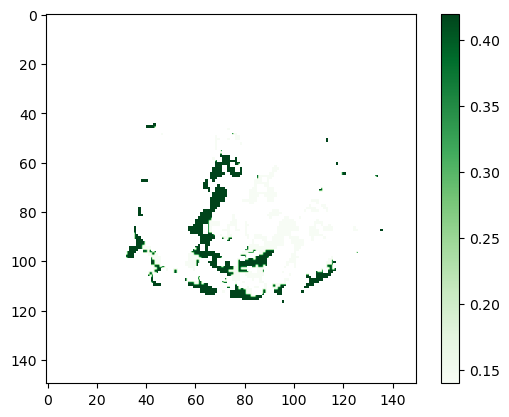

C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\1365893742.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


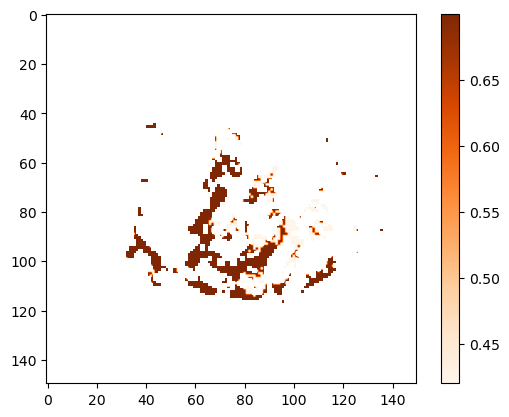

In [99]:
cmap = mpl.colormaps['Greens']
norm = plt.Normalize(vmin=np.nanmin(dose_ad), vmax=np.nanmax(dose_ad))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(dose_ad, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

cmap = mpl.colormaps['Oranges']
norm = plt.Normalize(vmin=np.nanmin(dose_ch), vmax=np.nanmax(dose_ch))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(dose_ch, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

In [110]:
InfRisk_Ad_sp = 1 - (1+(dAd_sp/N50)*(2**(1/alpha)-1))**-alpha
InfRisk_Ad_sw = 1 - (1+(dAd_sw/N50)*(2**(1/alpha)-1))**-alpha

InfRisk_Ch_pl = 1 - (1+(dCh_pl/N50)*(2**(1/alpha)-1))**-alpha
InfRisk_Ch_sw = 1 - (1+(dCh_sw/N50)*(2**(1/alpha)-1))**-alpha

print(InfRisk_Ad_sp)
print(InfRisk_Ad_sw)
print(InfRisk_Ch_pl)
print(InfRisk_Ch_sw)


0.002648760008314932
0.00778510985757197
0.00778510985757197
0.012719726386281938


In [111]:
# display on map
inf_ad = wclass.copy()
inf_ad[np.logical_or(inf_ad==2,inf_ad==3)] = InfRisk_Ad_sp
inf_ad[inf_ad==4] = InfRisk_Ad_sw

inf_ch = wclass.copy()
inf_ch[inf_ch==2] =InfRisk_Ch_pl
inf_ch[np.logical_or(inf_ch==3,inf_ch==4)] = InfRisk_Ch_sw

C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\1767858925.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


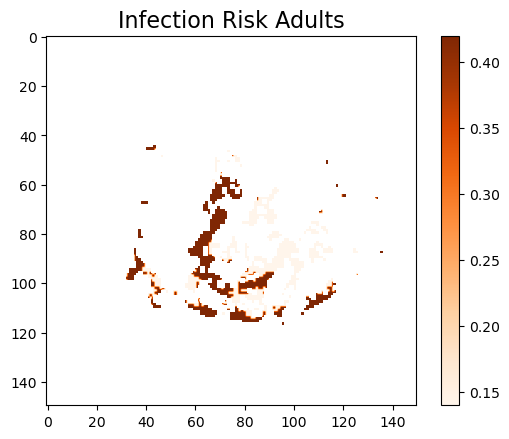

C:\Users\harezlak\AppData\Local\Temp\ipykernel_5560\1767858925.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


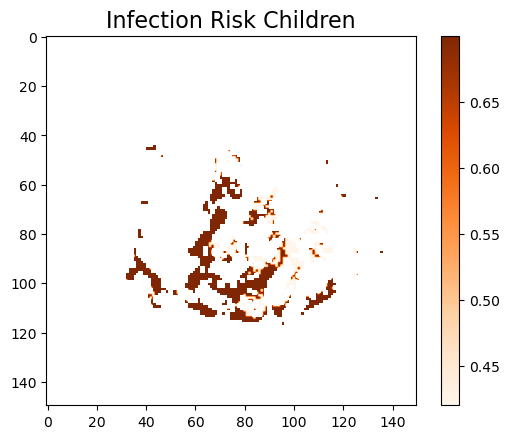

In [118]:
cmap = mpl.colormaps['Oranges']
norm = plt.Normalize(vmin=np.nanmin(dose_ad), vmax=np.nanmax(dose_ad))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()
plt.title('Infection Risk Adults', fontsize=16, color='black')
im = ax.imshow(dose_ad, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

cmap = mpl.colormaps['Oranges']
norm = plt.Normalize(vmin=np.nanmin(dose_ch), vmax=np.nanmax(dose_ch))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()
plt.title('Infection Risk Children', fontsize=16, color='black')
im = ax.imshow(dose_ch, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()
